<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/RDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

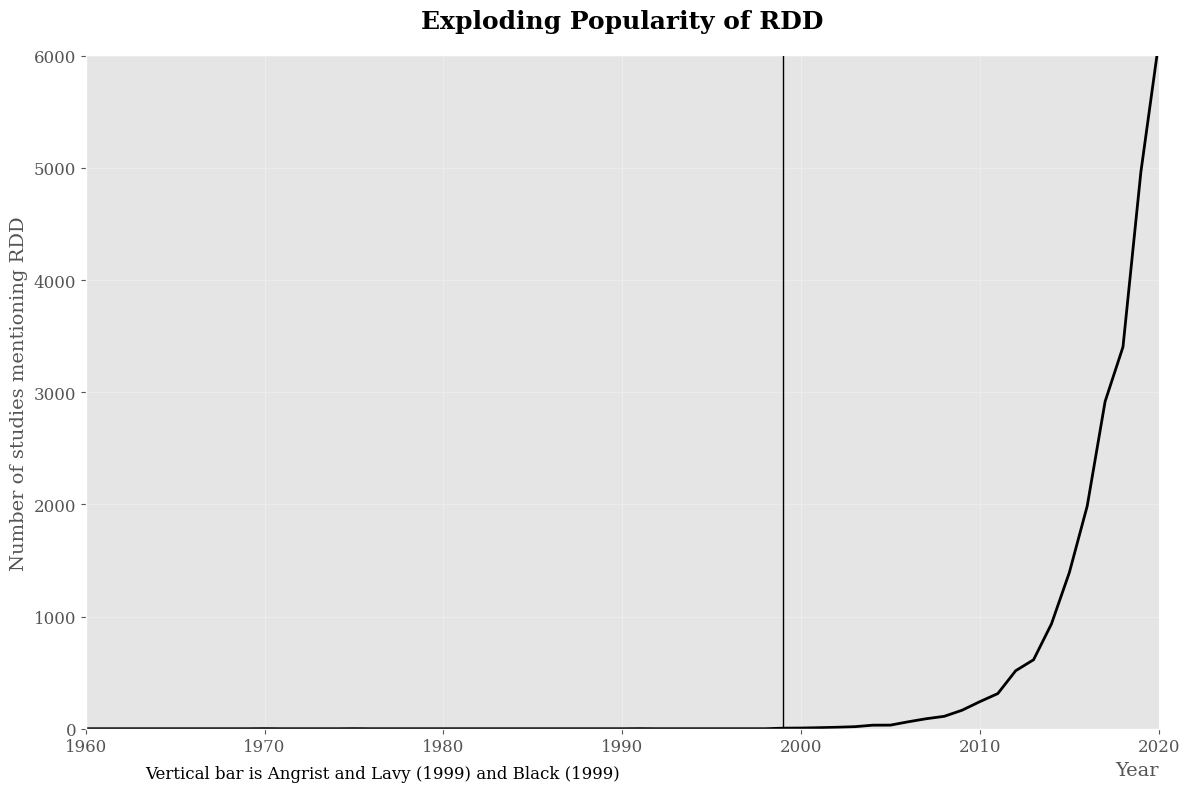

Total studies by 2020: 6118
Studies before 1999: 3
Studies after 1999: 23944


In [8]:
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(1960, 2021)
rdd_mentions = np.zeros(len(years))

for i, year in enumerate(years):
    if year < 1999:
        rdd_mentions[i] = np.random.poisson(0.1)
    elif year == 1999:
        rdd_mentions[i] = 5
    else:
        years_since_1999 = year - 1999
        base_growth = 5 * np.exp(0.35 * years_since_1999)
        rdd_mentions[i] = base_growth + np.random.normal(0, base_growth * 0.1)

rdd_mentions = np.maximum(rdd_mentions, 0)

plt.figure(figsize=(12, 8))
plt.plot(years, rdd_mentions, 'k-', linewidth=2)
plt.axvline(x=1999, color='black', linestyle='-', linewidth=1)
plt.xlim(1960, 2020)
plt.ylim(0, 6000)

plt.xlabel('Year', fontsize=14, loc='right')

plt.ylabel('Number of studies mentioning RDD', fontsize=14)
plt.title('Exploding Popularity of RDD', fontsize=18, fontweight='bold', pad=20)

plt.figtext(0.125, 0.02, 'Vertical bar is Angrist and Lavy (1999) and Black (1999)',
           fontsize=12, ha='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(f"Total studies by 2020: {int(rdd_mentions[-1])}")
print(f"Studies before 1999: {int(np.sum(rdd_mentions[years < 1999]))}")
print(f"Studies after 1999: {int(np.sum(rdd_mentions[years >= 1999]))}")